In [1]:
%matplotlib inline

import os
import json
import numpy as np
from filteralignedpitch import filteralignedpitch
import matplotlib.pyplot as plt

import pdb

In [2]:
examplefolder = 'ussak--sazsemaisi--aksaksemai----dede_salih_efendi'
pitchfile = os.path.join(examplefolder, 'pitch.json')
tonicfile = os.path.join(examplefolder, 'tonic.json')
alignednotefile = os.path.join(examplefolder, 'alignedNotes.json')


In [3]:
# load the data
pitch = np.array(json.load(open(pitchfile, 'r')))
tonic = json.load(open(tonicfile, 'r'))['scoreInformed']
notes = json.load(open(alignednotefile, 'r'))['notes']


In [4]:
synthPitch, pitch_chunks, notes = filteralignedpitch.correctOctaveErrors(pitch, notes, tonic)


In [ ]:
fig, ax = plt.subplots()
ax.plot(pitch[:,0], pitch[:,1], label='Pitch', alpha = 0.5)
plt.xlabel('Time (sec)')
plt.title('Pitch Class Distributions of the Makams')
plt.grid(True)

for chunk in pitch_chunks:
    ax.plot(chunk[:,0], chunk[:,1], 'g')    

for note in notes:
    ax.plot(note['Interval'], [note['Pitch']['Value'], note['Pitch']['Value']], 
            'r', alpha=0.4, linewidth=5)  
    
plt.show()


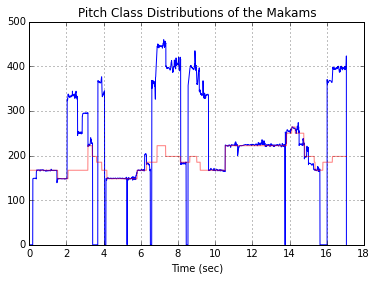

In [5]:
fig, ax = plt.subplots()
ax.plot(pitch[:,0], pitch[:,1], label='Pitch')
ax.plot(pitch[:,0], synthPitch, 'r', alpha = 0.5)
plt.xlabel('Time (sec)')
plt.title('Pitch Class Distributions of the Makams')
plt.grid(True)
    
plt.show()
